In [1]:
#import plotly.graph_objects as go

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import Stamen
import cartopy.io.img_tiles as cimgt
from matplotlib.transforms import offset_copy
#from ipyleaflet import Map

<function matplotlib.pyplot.show(*args, **kw)>

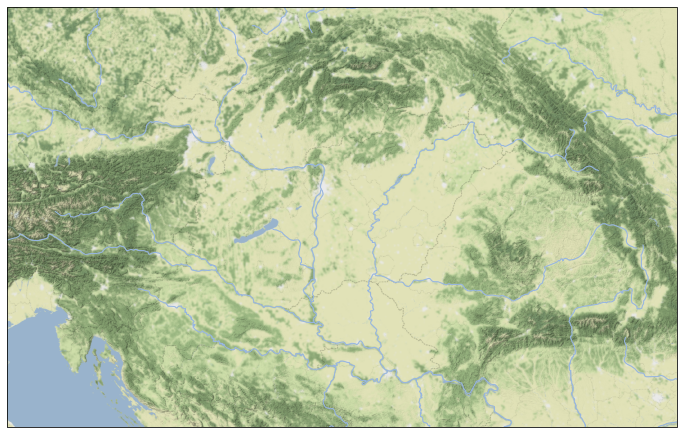

In [5]:
# getting terrain data
stamen_terrain = Stamen('terrain-background')

# declaring figure and size
fig = plt.figure(figsize=[12,10])

# decalring projection ( you can change projections accordign to your need)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# now we are giving corners of our map
ax.set_extent([12.5, 26.5, 44, 50])
#ax.set_extent([68., 98., 6., 37.])# , crs=ccrs.PlateCarree())

# this is overlaying terrain (8 = zoom level of terrain)
ax.add_image(stamen_terrain, 8)

#overlaying borders and rivers
#ax.add_feature(cfeature.BORDERS,linewidth=2)#, linestyle=':')
ax.add_feature(cfeature.RIVERS)

# this will mark the point where you need 
#plt.plot(19.06, 47.47, marker='*', color='red', markersize=12,
#             alpha=0.7, transform=ccrs.Geodetic())
#
#plt.plot(17.1077, 48.1486, marker='*', color='red', markersize=12,
#             alpha=0.7, transform=ccrs.Geodetic())
#
#48.1486° N, 17.1077° E

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
#plt.text(19.06, 47.47, u'Budapest',
#        verticalalignment='center', horizontalalignment='right',
#        transform=text_transform,fontsize=12,
#        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
#
#plt.text(17.1077, 48.1486, u'Bratislava',
#         verticalalignment='center', horizontalalignment='right',
#         transform=text_transform,fontsize=12,
#         bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

# Save image 
#plt.savefig('Hungary.png')
plt.show

In [6]:
stamen_terrain

In [7]:
!pwd

/Users/varungandhi/Downloads/python_notebooks


In [8]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


def bob():
    # Create a Stamen Terrain instance.
    stamen_terrain = cimgt.StamenTerrain()
    fig = plt.figure(figsize=[12,10])

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection= stamen_terrain.crs)
    #ax = plt.axes(projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([12.5, 26.5, 44, 50])

    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    #plt.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
    #         alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    #plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
    #        verticalalignment='center', horizontalalignment='right',
    #        transform=text_transform,
    #        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()





/Applications/miniconda3/envs/wrf-python/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  # Remove the CWD from sys.path while we load stuff.


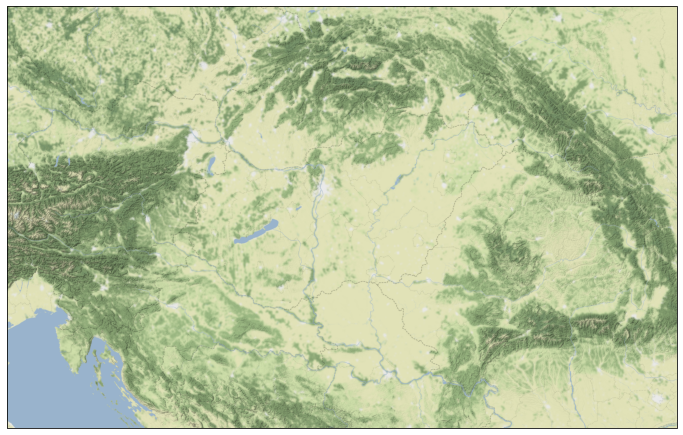

In [9]:
bob()

# This is the tutorial of WRF python

In [11]:
from __future__ import print_function
%matplotlib inline
#path to the data
wrf_directory = '/Volumes/Seagate Backup Plus Drive/wrf_tutorial/wrf_python_tutorial/wrf_tutorial_data'

wrf_files =  ["wrfout_d01_2005-08-28_00_00_00",
             "wrfout_d01_2005-08-28_12_00_00",
             "wrfout_d01_2005-08-29_00_00_00"]

import warnings
import numpy as np
import cartopy
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import os


from wrf import (getvar, interplevel, vertcross, 
                 CoordPair, ALL_TIMES, to_np,
                 get_cartopy, latlon_coords,
                 cartopy_xlim, cartopy_ylim)

wrf_files1 = [os.path.abspath(os.path.expanduser(
    os.path.join(wrf_directory, f))) for f in wrf_files]

#check that the wrf files exist

for f in wrf_files1:
    if not os.path.exists(f):
        raise ValueError ('{} does not exist' )

## Reading in wrfout files and taking a look at the data they contain ##

Now that all tests have passed, lets try reading in a single wrfout file with netcdf4 and looking at what data it contains.

The variable 'wrfin' from here on be used for all single variable examples

In [12]:
wrfin = Dataset(wrf_files1[0])
var = wrfin.variables['V']
# print(var)
# Other options of things you can look at:
# 'XLAT' 'XLONG' 

# Lets look at a specific attribute, 'coordinates', of that variable
coords = var.coordinates
# print(coords)
# To see all data presented in a numpy array try:
var_all_dat = var[:]
# print(var_all_dat)
# To select for a specific time index
t0_data = var[0:2]
print(t0_data)

[[[[ 8.18588138e-01  4.07810003e-01 -5.12637854e-01 ...  3.46315575e+00
     3.85702133e+00  4.10903645e+00]
   [ 8.29168558e-01  2.55365521e-01 -8.99866164e-01 ...  3.73470092e+00
     3.80150175e+00  3.80348301e+00]
   [ 4.48495209e-01 -1.10414326e-01 -1.11716819e+00 ...  3.83588409e+00
     3.30118871e+00  2.93609571e+00]
   ...
   [ 5.33586645e+00  5.38680553e+00  4.97039080e+00 ... -2.95877993e-01
    -2.88097024e-01 -1.13205619e-01]
   [ 5.55786800e+00  5.42194271e+00  5.08211994e+00 ... -4.58898209e-02
    -6.49426132e-02  1.09424904e-01]
   [ 5.83901310e+00  5.65956354e+00  5.30393696e+00 ...  2.31534719e-01
     2.03359768e-01  4.18463647e-01]]

  [[ 8.59084785e-01  4.44858283e-01 -5.51006317e-01 ...  3.68166494e+00
     4.03113747e+00  4.26857138e+00]
   [ 8.87855411e-01  2.35710174e-01 -9.06241894e-01 ...  4.02288866e+00
     4.07869625e+00  4.09107208e+00]
   [ 4.29820538e-01 -1.68596536e-01 -1.29083967e+00 ...  4.41126442e+00
     3.53378344e+00  3.03390980e+00]
   ...
   

In [13]:
# Open data file using xarray 
ds = xr.open_dataset(wrf_files1[0], decode_times=False)
# print(ds)

# This defines the file name, you can change this to be whatever you like as long as it is in quotes
new_file = "single_wrf_file_subset.nc"

# This represents the data variables that you want to extract. 
# These are the minimum variables needed for most wrf functions
toinclude = ['HGT', 'QVAPOR', 'QRAIN', 'QCLOUD', 'P', 'PB', 'PHB', 'PH', 'T', 'U', 'V']

# This will create a new data file with the variables and file name provided
# ds[toinclude].to_netcdf(new_file)

In [14]:
# Use 'wrfin' variable 

# Let's use wrf.getvar() to define and extract "height" variable
# Use two different timeidx values: 'ALL_TIMES' and and int between 0 and 3
hgt = getvar(wrfin, 'height', timeidx=0) # What is the difference when using ALL_TIMES vs an int?

print(hgt.shape)
print(hgt)

# What do you notice when using different time indexes? 

(29, 73, 90)
<xarray.DataArray 'height' (bottom_top: 29, south_north: 73, west_east: 90)>
array([[[  945.71625 ,   851.59564 ,  1112.1707  , ...,    30.325289,
            30.318182,    30.28183 ],
        [ 1545.8838  ,  1482.51    ,  1743.5214  , ...,    30.357103,
            30.33118 ,    30.289024],
        [ 2015.4645  ,  2132.7654  ,  2336.6702  , ...,    45.30595 ,
            54.560974,    52.540306],
        ...,
        [  931.7109  ,   906.58606 ,   850.66223 , ...,    47.566196,
            42.868397,    39.25265 ],
        [  912.6646  ,   871.99146 ,   829.11066 , ...,    50.54069 ,
            44.59204 ,    40.01426 ],
        [  933.89813 ,   891.87317 ,   845.05554 , ...,    56.942154,
            45.73114 ,    40.755768]],

       [[ 1019.3371  ,   924.95416 ,  1184.8784  , ...,   104.14779 ,
           104.084015,   104.00254 ],
        [ 1617.7285  ,  1554.756   ,  1814.6649  , ...,   104.2065  ,
           104.1027  ,   104.08364 ],
        [ 2085.935   ,  2202.97

In [15]:
# These examples will use the 'wrfin' variable. 

# Find sea level pressure (slp)
slp = getvar(wrfin, 'slp', units='mmhg') # This uses default units of hPa, but can be changed. Try units like Pa, mb, or mmhg  
# print(slp)

# Find temperature (temp)
temp = getvar(wrfin, 'temp', units='degF') # Default units are Kelvin (K), try with degC or degF as well
# print(temp)

In [16]:
#try with multiple wrf files 

data = [Dataset(f) for f in wrf_files1]
# Find slp and use the arguments for timeidx and units ('mb') for practice
slp = getvar(data, 'slp', timeidx=8, units='mb') # Difference between All_TIMES and using int?
print(slp)
print(slp.shape)

<xarray.DataArray 'slp' (south_north: 73, west_east: 90)>
array([[1005.59766, 1006.5532 , 1008.0106 , ..., 1008.6874 , 1008.7415 ,
        1008.8016 ],
       [1006.8632 , 1007.72314, 1008.94745, ..., 1008.85175, 1008.946  ,
        1009.7403 ],
       [1007.9812 , 1009.3069 , 1010.06055, ..., 1008.9118 , 1009.16486,
        1010.12506],
       ...,
       [1008.617  , 1009.7796 , 1010.15106, ..., 1011.46246, 1011.4978 ,
        1011.45306],
       [1008.7501 , 1009.4004 , 1009.9343 , ..., 1011.53546, 1011.5264 ,
        1011.50323],
       [1009.1396 , 1009.1863 , 1009.39514, ..., 1011.60065, 1011.5598 ,
        1011.5563 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.0 -100.7 ... -77.26 -76.99
    XLAT     (south_north, west_east) float32 19.11 19.11 19.11 ... 36.22 36.22
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY


## Combining variables across multiple files ##
 There are two methods for combining variables across multiple files:
  - **cat** - combines the the variable along the Time dimension (Note: you must order the files yourself)
  - **join** - creates a new left-most dimension for each file

    *Default is 'cat'*

To extract all times in to a single array, set timeidx to wrf.ALL_TIMES (an alias for None).

We will first use the 'cat' method in the following block, then the 'join' method in the block after.

In [17]:
# Because we have already defined the file_paths and wrf_files variables above, we will skip redefining them here

# Find slp using ALL_TIMES and 'cat' method
slp = getvar(data, 'slp', timeidx=ALL_TIMES, method='cat')

print(slp.shape) # Notice the shape of the array
print(slp)

(9, 73, 90)
<xarray.DataArray 'slp' (Time: 9, south_north: 73, west_east: 90)>
array([[[1008.0681 , 1008.5668 , 1009.98895, ..., 1008.9346 ,
         1009.03534, 1009.14624],
        [1009.84186, 1010.088  , 1010.82855, ..., 1009.1437 ,
         1009.37805, 1010.04895],
        [1011.1046 , 1011.50616, 1011.97705, ..., 1009.7125 ,
         1010.7363 , 1010.56726],
        ...,
        [1011.43494, 1011.5658 , 1011.5837 , ..., 1013.4846 ,
         1013.5271 , 1013.5879 ],
        [1011.1947 , 1011.2986 , 1011.39557, ..., 1013.6106 ,
         1013.64453, 1013.69977],
        [1011.06085, 1011.1657 , 1011.2633 , ..., 1013.7362 ,
         1013.7507 , 1013.8044 ]],

       [[1009.04877, 1009.9049 , 1011.2189 , ..., 1009.2124 ,
         1009.2859 , 1009.3749 ],
        [1010.57367, 1011.02136, 1012.0837 , ..., 1009.4918 ,
         1009.5938 , 1010.2147 ],
        [1011.70764, 1012.7197 , 1013.5105 , ..., 1009.67847,
         1009.7583 , 1010.7029 ],
...
        [1010.0159 , 1010.5553 , 1010.

In [18]:
# Try with the 'join' method instead
slp = getvar(data, "slp", timeidx=ALL_TIMES, method='join')

print(slp.shape) # Notice the shape of the array
print(slp)

# What is different between the two methods? Is this what we expected?

(3, 4, 73, 90)
<xarray.DataArray 'slp' (file: 3, Time: 4, south_north: 73, west_east: 90)>
array([[[[1008.0681 , 1008.5668 , 1009.98895, ..., 1008.9346 ,
          1009.03534, 1009.14624],
         [1009.84186, 1010.088  , 1010.82855, ..., 1009.1437 ,
          1009.37805, 1010.04895],
         [1011.1046 , 1011.50616, 1011.97705, ..., 1009.7125 ,
          1010.7363 , 1010.56726],
         ...,
         [1011.43494, 1011.5658 , 1011.5837 , ..., 1013.4846 ,
          1013.5271 , 1013.5879 ],
         [1011.1947 , 1011.2986 , 1011.39557, ..., 1013.6106 ,
          1013.64453, 1013.69977],
         [1011.06085, 1011.1657 , 1011.2633 , ..., 1013.7362 ,
          1013.7507 , 1013.8044 ]],

        [[1009.04877, 1009.9049 , 1011.2189 , ..., 1009.2124 ,
          1009.2859 , 1009.3749 ],
         [1010.57367, 1011.02136, 1012.0837 , ..., 1009.4918 ,
          1009.5938 , 1010.2147 ],
         [1011.70764, 1012.7197 , 1013.5105 , ..., 1009.67847,
          1009.7583 , 1010.7029 ],
...
       

### Interplevel function ###
 - The easiest way to get a field at a specified height or pressure vertical level (500 mb, 5000 m, etc).
 - Uses linear interpolation, which is fast and generally good enough for plotting.
 - You should use vinterp for geopotential height if you want more accuracy, since the interpolation is done with the decaying exponential pressure profile.

In [19]:
# Use single file path (wrfin) for this example
# Extract pressure and z/height variables for time index 0
pres = getvar(wrfin, 'pressure', timeidx=0)
ht = getvar(wrfin, 'z', timeidx=0, units='m') # Use units of meters ('m')

# Create variable 'ht_500' for interpolation at the 500 hPa level
ht_500 = interplevel(ht, pres, 500.0) # What does the last argument of this function represent? What are the units for it?

print(ht_500)

<xarray.DataArray 'height_interp' (south_north: 73, west_east: 90)>
array([[5910.48  , 5921.3975, 5924.3096, ..., 5894.322 , 5892.936 ,
        5891.851 ],
       [5891.451 , 5901.656 , 5906.4966, ..., 5896.076 , 5895.119 ,
        5894.6274],
       [5897.6562, 5900.0874, 5898.296 , ..., 5897.6147, 5896.4673,
        5895.9224],
       ...,
       [5901.6494, 5900.2744, 5899.1177, ..., 5886.303 , 5886.465 ,
        5886.476 ],
       [5901.703 , 5900.695 , 5899.57  , ..., 5885.7812, 5885.9136,
        5885.898 ],
       [5901.4346, 5900.5493, 5899.527 , ..., 5884.939 , 5884.971 ,
        5884.863 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.0 -100.7 ... -77.26 -76.99
    XLAT     (south_north, west_east) float32 19.11 19.11 19.11 ... 36.22 36.22
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
    level    float64 500.0
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          m
 

### Vertcross function ###
The idea is to draw a horizontal line at the surface, and the cross section is defined as a vertical plane extending up from this line.

 - The new x-axis for a cross section plot is the points along the line you made. The line can be defined by:
     - Defining a start point and an end point by using (x,y) grid coordinates or (latitude, longitude) coordinates.
     - Defining a pivot point and an angle, which is useful for cross sections that will span most of the domain.
 - The new y-axis will be a set of vertical levels at default intervals (1% increments), or you can choose them yourself.
 
### Using CoordPair Class with Vertcross ###
A CoordPair is simply used to store (x,y) coordinates, or (lat,lon) coordinates. It is also possible to have (x, y, lat, lon), but that's mostly used for metadata.

The CoordPair will be used to define your cross section line.

In [20]:
# Use single file path (wrfin) for this example

# Use the wrfin XLAT and XLONG variables to create coordinates
lat_coords = wrfin.variables['XLAT']
lon_coords = wrfin.variables['XLONG']

# Numpy is used to identify the start and stop lat/lon coordinate pairs
coord_start = (np.amin(lat_coords), np.amin(lon_coords))
coord_end = (np.amax(lat_coords), np.amax(lon_coords))

start_point = CoordPair(lat=coord_start[0],lon=coord_start[1]) # Why is the coordinate selected this way?
end_point = CoordPair(lat=coord_end[0],lon=coord_end[1])

# Let's get wind speed ('wspd_wdir') in kts at time index 0
wspd_wdir = getvar(wrfin, 'wspd_wdir', timeidx=0, units='kts')

# Get the height levels ('z') at the correct time idx
ht = getvar(wrfin, 'z', timeidx=0)

# Compute the wind speed cross section
wspd_cross = vertcross(wspd_wdir, ht, wrfin=wrfin, start_point=start_point, end_point=end_point)

print(wspd_cross)

<xarray.DataArray 'wspd_wdir_cross' (wspd_wdir: 2, vertical: 100, cross_line_idx: 115)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,   6.6589932,
           7.310721 ,   8.34278  ],
        [        nan,         nan,         nan, ...,   9.173474 ,
          10.298722 ,  11.673863 ],
        ...,
        [ 30.791243 ,  30.527824 ,  30.21583  , ...,   9.146236 ,
           9.104509 ,   9.075556 ],
        [ 32.16003  ,  31.79801  ,  31.464676 , ...,   9.643409 ,
           9.628514 ,   9.63235  ],
        [        nan,  33.068195 ,  32.713524 , ...,  10.140581 ,
          10.152519 ,  10.189144 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., 106.12919  ,
         112.115265 , 116.86441  ],
        [        nan,         nan,         nan, ..., 124.275566 ,
         129.51

# Let's Start Plotting! #

We will be focusing primarily on plotting with Cartopy in this section of the tutorial. We will not be covering plotting with Basemap as Basemap is no [longer being maintained](https://matplotlib.org/basemap/users/intro.html#:~:text=The%20Cartopy%20project%20will%20replace,switching%20over%20to%20use%20Cartopy.) and is encouraging users to use Cartopy instead. If you have interest in Basemap examples, there are examples on the WRF-Python readthedocs page that cover the process of using [Basemap with WRF-Python](https://wrf-python.readthedocs.io/en/latest/plot.html#matplotlib-with-basemap).

## WRF-Python Helper Function Overview ##
 - **get_cartopy**: Returns mapping object used by cartopy 
 - **latlon_coords**: Returns the latitude and longitude coordinate variables

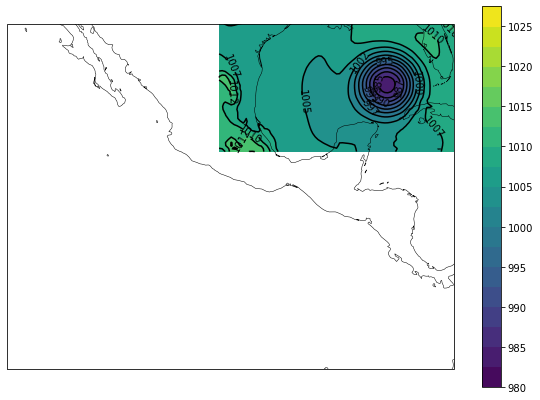

In [21]:
# Use single wrf file for this example
# Extract terrrain height variable "slp" at time index 0 using getvar
slp = getvar(wrfin, 'slp', timeidx=0)

# Extract cartopy object and lat/lon coordinates using get_cartopy and latlon_coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Verify cartopy object and lat/lon coordinates were processed
# print(cart_proj, '\n', lats, '\n', lons)

# Create a figure and axes object
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=cart_proj) # Set map projection with cart_proj. What do you notice about the map displayed?

# Add features to axes object 
ax.coastlines(linewidth=0.5)

# Add features to the map like contour lines
# Set contour levels 
lvl = np.arange(980,1030,2.5) # Non-inclusive of end value (1030)

# Add contour lines
slp_contours = plt.contour(lons,
            lats,
            slp, 
            levels=lvl,
            colors='k',
            transform=crs.PlateCarree())

# Add filled contour lines
plt.contourf(lons,
             lats,
             slp,
             levels=lvl,
             transform=crs.PlateCarree(),
             cmap='viridis')

# Add colorbar
plt.colorbar(ax=ax, shrink=0.7)
plt.clabel(slp_contours, fmt = "%i")

# Manually set extent of map projection
ax.set_extent([-120, -80, 0, 28])

plt.show()

# Is there data missing from this projection?

# Overlaying Multiple Diagnostics #
In these examples, we will extract many variables and then overlay all of them on one projection. 

### Dew point temp, sea level pressure, and winds ###

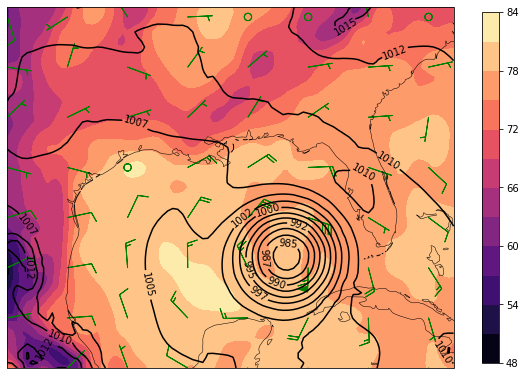

In [22]:
# Use single wrf file for this example
# Get "slp", "td2", "ua", and "va" variables 
slp = getvar(wrfin, "slp", timeidx=0)
td2 = getvar(wrfin, "td2", timeidx=0, units="degF") # Use units "degF"
u_sfc = getvar(wrfin, "ua", timeidx=0, units="kts")[0,:] # subset data to match size of td2 and slp, use units "kts"
v_sfc = getvar(wrfin, "va", timeidx=0, units="kts")[0,:]

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Create a figure and get the axes object
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection=cart_proj)

# Add projection features
ax.coastlines(linewidth=0.5)

# Manually setting the contour levels
slp_levels = np.arange(980, 1030, 2.5)
td2_levels = np.arange(48, 85, 3)

# Make sea level pressure contour lines.
slp_contours = plt.contour(lons,
            lats,
            slp,
            levels=slp_levels,
            colors='k',
            transform=crs.PlateCarree())

# Make filled countours for 2m dewpoint temperature.
plt.contourf(lons,
             lats,
             td2,
             levels=td2_levels,
             transform=crs.PlateCarree(),
             cmap='magma')

# Plot the wind barbs, but only plot ~7 barbs in each direction.
thin = [int(x/7.) for x in lons.shape]
plt.barbs(to_np(lons[::thin[0], ::thin[1]]), # Why are we using to_np here?
          to_np(lats[::thin[0], ::thin[1]]),
          to_np(u_sfc[::thin[0], ::thin[1]]),
          to_np(v_sfc[::thin[0], ::thin[1]]),
          transform=crs.PlateCarree(),
          color = 'green')

# Add contour labels for pressure
plt.clabel(slp_contours, fmt="%i")

# Add a color bar
plt.colorbar(ax=ax, shrink=.86, extendrect=True)

plt.show()

### 850 hPa Heights and Winds with interplevel ###

/Applications/miniconda3/envs/wrf-python/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1913: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Applications/miniconda3/envs/wrf-python/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1913: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)


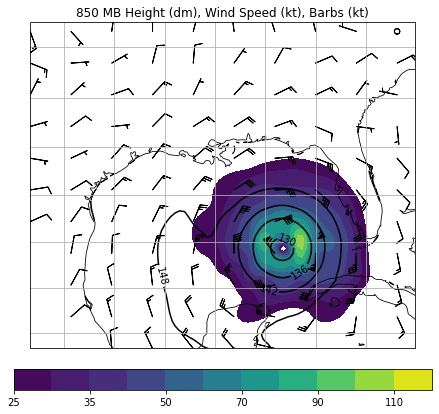

In [23]:
# Use single wrf file for this example
# Extract pressure, height (z), and wind variables
p = getvar(wrfin, "pressure")
z = getvar(wrfin, "z", units="dm")
ua = getvar(wrfin, "ua", units="kt")
va = getvar(wrfin, "va", units="kt")
wspd = getvar(wrfin, "wspd_wdir", units="kt")[0,:]

# Interpolate height, u and v winds, and windspeed to 850 hPa
ht_850 = interplevel(z, p, 850) 
u_850 = interplevel(ua, p, 850)
v_850 = interplevel(va, p, 850)
wspd_850 = interplevel(wspd, p, 850)

# Get the lat/lon coordinates using ht_850
lats, lons = latlon_coords(ht_850)

# Get the map projection information using ht_850
cart_proj = get_cartopy(ht_850)

# Create the figure
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection=cart_proj)

# Add coastlines to the projection
ax.coastlines(linewidth=0.8)

# Add the 850 hPa geopotential height contour lines
levels = np.arange(130., 170., 6.)
contours = plt.contour(lons,
                       lats,
                       ht_850,
                       levels=levels,
                       colors="black",
                       zorder=1,
                       transform=crs.PlateCarree())

plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed filled contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120] # Why not use np.arange/np.linspace?

wspd_contours = plt.contourf(lons,
                             lats,
                             wspd_850,
                             levels=levels,
                             cmap="viridis",
                             zorder=0,
                             transform=crs.PlateCarree())

plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", 
             pad=.05, shrink=.75)

# Add the 850 hPa wind barbs, only plotting 10 barbs in each direction
# Also, skipping the border barbs.
thin = [int(x/10.) for x in lons.shape]
plt.barbs(to_np(lons[::thin[0], ::thin[1]]),
          to_np(lats[::thin[0], ::thin[1]]),
          to_np(u_850[::thin[0], ::thin[1]]),
          to_np(v_850[::thin[0], ::thin[1]]),
          transform=crs.PlateCarree(),
          length=6)

ax.gridlines()

plt.title("850 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()


## Plotting multiple wrfout files ##
Chances are, you are running a simulation over many timesteps which creates multiple wrfout files. Here we will go over using many wrfout files and some of the ways you can display them together.

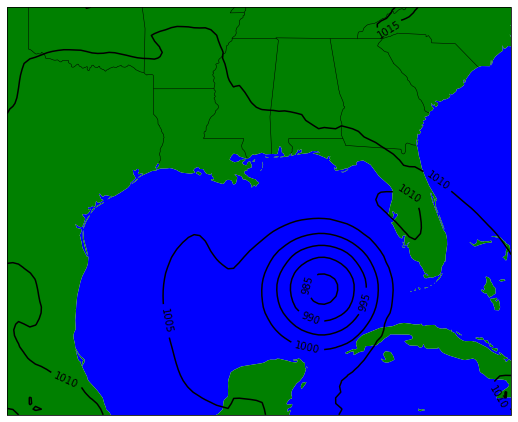

In [24]:
#Import animation specific Python packages
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Use multi-file variable 'wrf_files' for this example
# Get sea level pressure for all times
slp_all = getvar(data, "slp", timeidx=ALL_TIMES) # Why use ALL_TIMES instead of a time index?
# Get the cartopy projection object
cart_proj = get_cartopy(slp_all)

# Create figure and ax object
fig = plt.figure(figsize=(10,7.5))
ax_slp = plt.axes(projection=cart_proj)

# Download and create the states, land, and oceans using cartopy features
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                      name='admin_1_states_provinces_lines')
land = NaturalEarthFeature(category='physical', name='land', scale='50m',
                                    facecolor='green')
ocean = NaturalEarthFeature(category='physical', name='ocean', scale='50m',
                                     facecolor='blue')

slp_levels = np.arange(950, 1030, 5)

num_frames = slp_all.shape[0] # Why are we looking at the shape to get the number of frames?

# This function is called for each frame of the animation, where
# i is the frame index. Here is where the animation frames need 
# to be created.
def animate(i):
    ax_slp.clear()
    slp = slp_all[i,:]
    
    # Get the lat/lon coordinates
    lats, lons = latlon_coords(slp)
    
    ax_slp.add_feature(ocean)
    ax_slp.add_feature(land)
    ax_slp.add_feature(states, linewidth=.5, edgecolor="black")
    
    slp_contours = ax_slp.contour(to_np(lons), 
                                  to_np(lats), 
                                  to_np(slp), 
                                  levels=slp_levels,
                                  colors="black", 
                                  zorder=5,
                                  transform=crs.PlateCarree()) 
    
    # Add contour labels for pressure
    ax_slp.clabel(slp_contours, fmt="%i")
    
    # Set the map bounds
    ax_slp.set_xlim(cartopy_xlim(slp))
    ax_slp.set_ylim(cartopy_ylim(slp))
    
    return ax_slp


# Create the animation by supplying a figure, the animation object, 
# the number of frames and an interval in milliseconds that is the 
# delay between frames.
ani = FuncAnimation(fig, animate, num_frames, interval=500)

# To work with jupyter notebook, you need to use the HTML generated
# by the HTML function in the IPython.display package.
# If you change 'to_jshtml' to be 'to_html5_video', you will get an 
# HTML5 video instead.

#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())